In [1]:
#get required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Lasso

pd.set_option('display.max_columns',200) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv('FantasyFootball2021.csv')

In [3]:
teams = []
for team in df['Team']:
    teams.append(team)

In [4]:
df = df.set_index('Team')

In [5]:
df = df.drop(['PFPW','PAPW','AveQBPts','AveRBPts','AveWRPts','AveTEPts','AveFlexPts','AveDSTPts','AveKPts'],axis = 1)

In [6]:
df

,Wins,Losses,WinPct,PtsFor,PtsAgnst,AveOppWinPct,QBPts,RBPts,WRPts,TEPts,FlexPts,DSTPts,KPts,Moves,DraftPick,MadePlayoffs,Winner
Team,,,,,,,,,,,,,,,,,
Team0,6,8,0.43,1634.84,1675.38,0.48,222.34,400.20,372.40,215.5,177.90,103,124,31,9,0,0
Team1,2,12,0.14,1134.30,1624.02,0.53,114.30,372.36,300.10,95.4,163.60,66,42,9,7,0,0
Team2,12,2,0.86,1977.08,1613.24,0.47,280.68,518.20,520.30,211.4,194.50,148,104,18,2,1,0
Team3,8,6,0.57,1819.94,1689.72,0.52,272.74,525.00,396.90,176.6,221.70,97,130,29,4,1,0
Team4,7,7,0.50,1594.90,1715.08,0.47,278.20,423.60,427.50,159.2,160.40,55,91,14,6,0,0
Team5,5,9,0.36,1485.48,1676.32,0.55,207.08,373.20,362.60,154.9,173.70,94,118,36,1,0,0
Team6,7,7,0.50,1712.90,1644.38,0.53,323.50,467.00,487.50,100.2,147.70,79,108,2,5,0,0
Team7,4,10,0.29,1542.40,1651.30,0.51,314.50,371.60,360.20,116.2,177.00,104,99,15,3,0,0
Team8,11,3,0.79,1965.20,1611.42,0.43,308.60,509.00,520.20,205.4,181.90,92,148,20,10,1,1


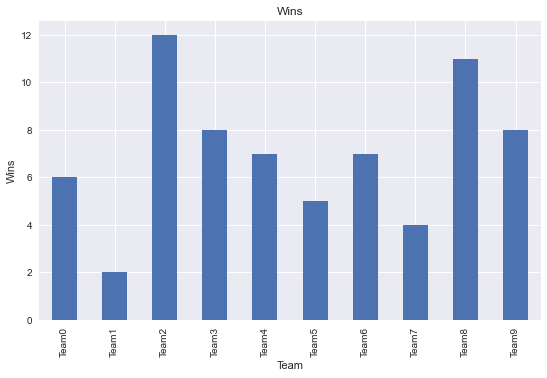

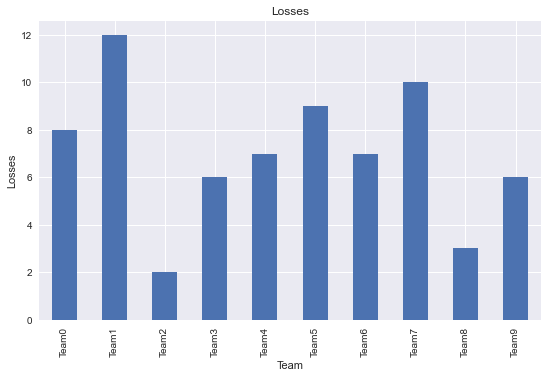

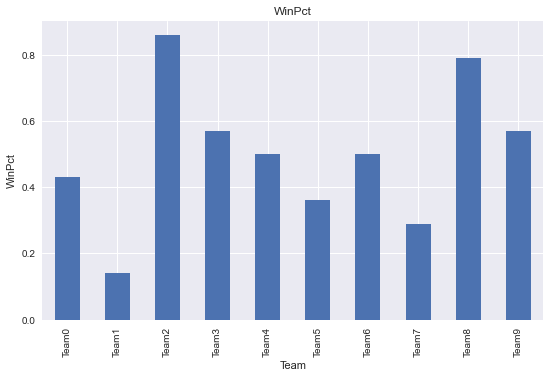

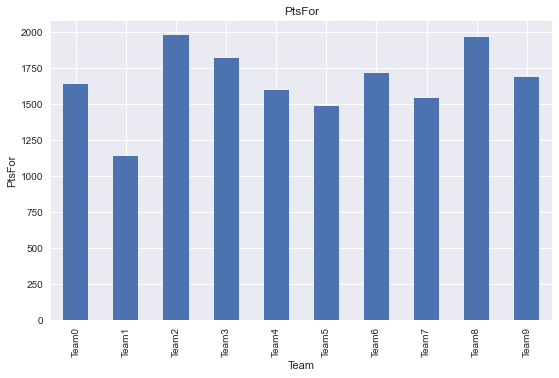

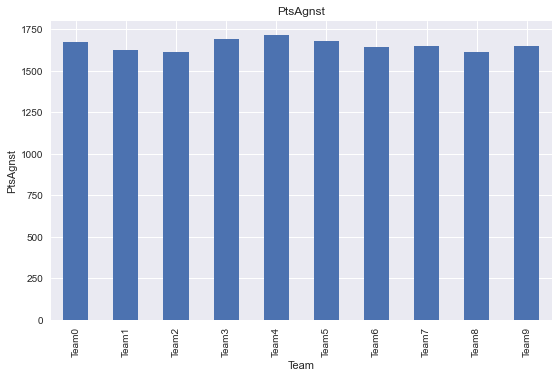

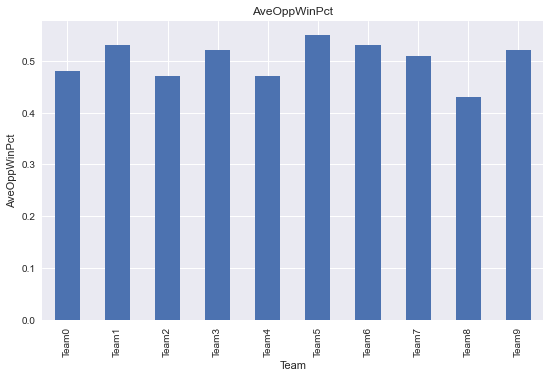

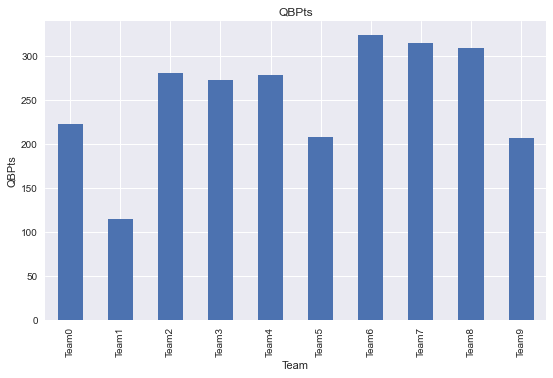

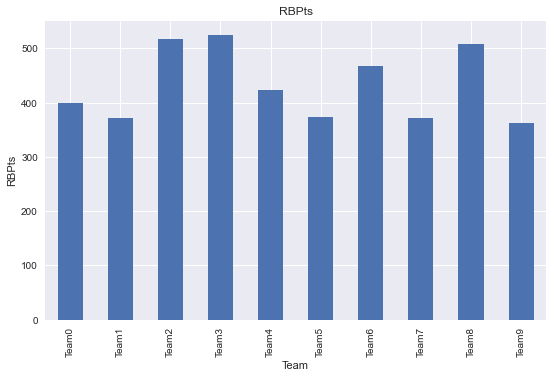

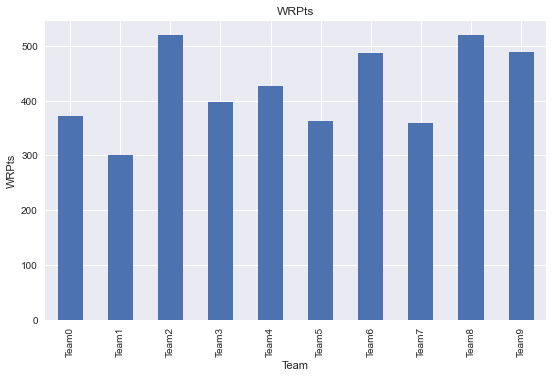

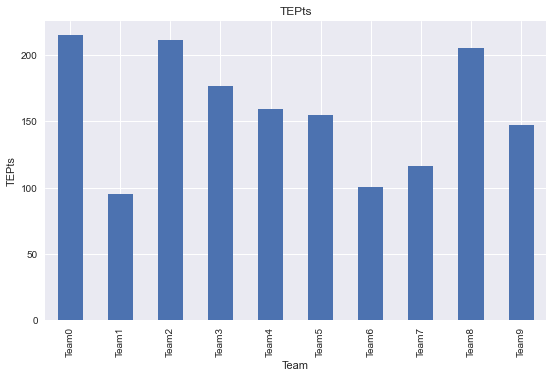

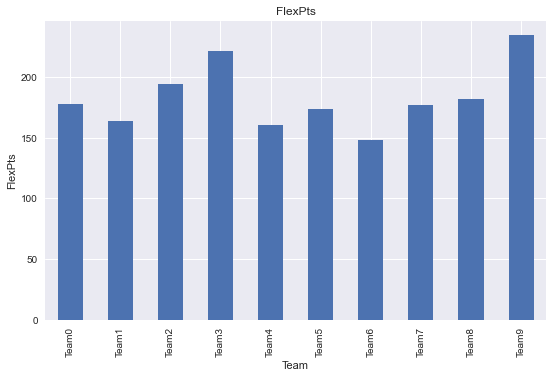

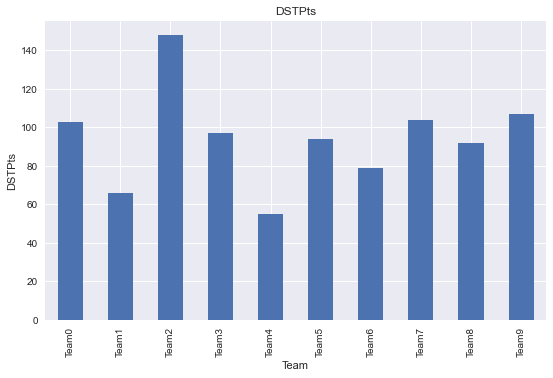

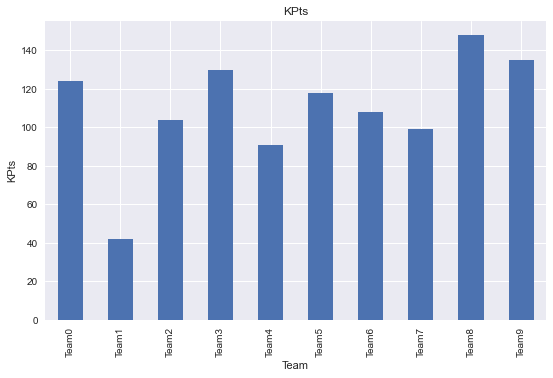

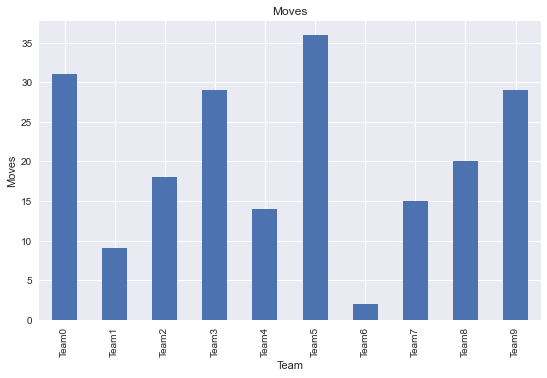

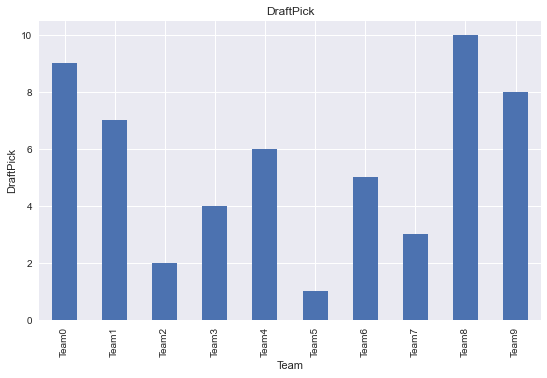

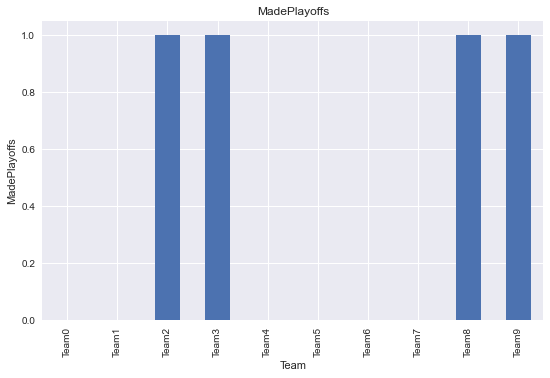

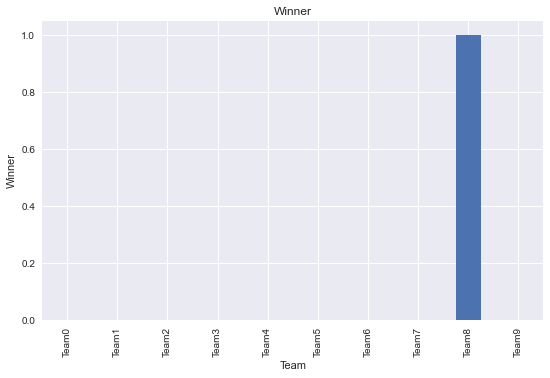

In [7]:
for column in df:
    df[column].plot.bar()
    plt.xlabel('Team')
    plt.ylabel(column)
    plt.title(column)
    plt.show()

In [8]:
winner = [0,0,0,0,0,0,0,0,1,0]

In [9]:
df['Champion'] = winner

In [10]:
df

,Wins,Losses,WinPct,PtsFor,PtsAgnst,AveOppWinPct,QBPts,RBPts,WRPts,TEPts,FlexPts,DSTPts,KPts,Moves,DraftPick,MadePlayoffs,Winner,Champion
Team,,,,,,,,,,,,,,,,,,
Team0,6,8,0.43,1634.84,1675.38,0.48,222.34,400.20,372.40,215.5,177.90,103,124,31,9,0,0,0
Team1,2,12,0.14,1134.30,1624.02,0.53,114.30,372.36,300.10,95.4,163.60,66,42,9,7,0,0,0
Team2,12,2,0.86,1977.08,1613.24,0.47,280.68,518.20,520.30,211.4,194.50,148,104,18,2,1,0,0
Team3,8,6,0.57,1819.94,1689.72,0.52,272.74,525.00,396.90,176.6,221.70,97,130,29,4,1,0,0
Team4,7,7,0.50,1594.90,1715.08,0.47,278.20,423.60,427.50,159.2,160.40,55,91,14,6,0,0,0
Team5,5,9,0.36,1485.48,1676.32,0.55,207.08,373.20,362.60,154.9,173.70,94,118,36,1,0,0,0
Team6,7,7,0.50,1712.90,1644.38,0.53,323.50,467.00,487.50,100.2,147.70,79,108,2,5,0,0,0
Team7,4,10,0.29,1542.40,1651.30,0.51,314.50,371.60,360.20,116.2,177.00,104,99,15,3,0,0,0
Team8,11,3,0.79,1965.20,1611.42,0.43,308.60,509.00,520.20,205.4,181.90,92,148,20,10,1,1,1


In [11]:
dfWins = df.copy()

In [12]:
y1 = dfWins['MadePlayoffs']

In [13]:
y1

Team
Team0    0
Team1    0
Team2    1
Team3    1
Team4    0
Team5    0
Team6    0
Team7    0
Team8    1
Team9    1
Name: MadePlayoffs, dtype: int64

In [14]:
X1 = dfWins.drop(['MadePlayoffs'],axis=1)

In [15]:
X1

,Wins,Losses,WinPct,PtsFor,PtsAgnst,AveOppWinPct,QBPts,RBPts,WRPts,TEPts,FlexPts,DSTPts,KPts,Moves,DraftPick,Winner,Champion
Team,,,,,,,,,,,,,,,,,
Team0,6,8,0.43,1634.84,1675.38,0.48,222.34,400.20,372.40,215.5,177.90,103,124,31,9,0,0
Team1,2,12,0.14,1134.30,1624.02,0.53,114.30,372.36,300.10,95.4,163.60,66,42,9,7,0,0
Team2,12,2,0.86,1977.08,1613.24,0.47,280.68,518.20,520.30,211.4,194.50,148,104,18,2,0,0
Team3,8,6,0.57,1819.94,1689.72,0.52,272.74,525.00,396.90,176.6,221.70,97,130,29,4,0,0
Team4,7,7,0.50,1594.90,1715.08,0.47,278.20,423.60,427.50,159.2,160.40,55,91,14,6,0,0
Team5,5,9,0.36,1485.48,1676.32,0.55,207.08,373.20,362.60,154.9,173.70,94,118,36,1,0,0
Team6,7,7,0.50,1712.90,1644.38,0.53,323.50,467.00,487.50,100.2,147.70,79,108,2,5,0,0
Team7,4,10,0.29,1542.40,1651.30,0.51,314.50,371.60,360.20,116.2,177.00,104,99,15,3,0,0
Team8,11,3,0.79,1965.20,1611.42,0.43,308.60,509.00,520.20,205.4,181.90,92,148,20,10,1,1


In [16]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

iteration 0.005 done
iteration 0.05 done
iteration 0.1 done
iteration 0.5 done
iteration 0.75 done
iteration 1 done
iteration 5 done


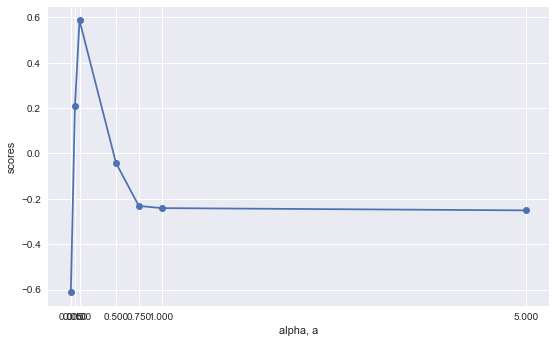

In [17]:
#Test different values for alpha to find best R^2 value

#alpha test value array
alphas = [0.005, 0.05, 0.1, 0.5, 0.75, 1, 5] # here alpha is the lambda in the lecture note, the coefficient of lasso penalty
#bin array for resultant R^2 values
scores = []

#create lasso and test for each value in alphas array
for a in alphas:
    lasso = Lasso(alpha = a, normalize = False, max_iter = 10000) # I choose normalize = False here
    lasso.fit(X1_train, y1_train)
    #yhat_test=lasso.predict(X_test)
    #scores.append(mean_squared_error(y_test, yhat_test))
    scores.append(lasso.score(X1_test, y1_test))
    print("iteration {} done".format(a))


#plot result scores against test alpha values
plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

In [18]:
#create lasso regression with best alpha value and get R^2 value
lasso = Lasso(alpha = .1, normalize = False, max_iter = 10000)
lasso.fit(X1_train, y1_train)
lasso_pred = lasso.predict(X1_test)
lasso.score(X1_test, y1_test)

0.586707968574417

In [19]:
#create and view df containing resultant beta coefficients for lasso regression
lasso_coef = lasso.fit(X1_train, y1_train).coef_
df_lasso = pd.DataFrame([lasso_coef])
names = X1.columns
df_lasso.columns = names
df_lasso = df_lasso.T
df_lasso=df_lasso.rename(columns = {0:'corr_lasso_coeff'})# corr_lasso_coeff is corresponding lasso coefficients of the variable
df_lasso

,corr_lasso_coeff
Wins,0.000000
Losses,-0.000000
WinPct,0.000000
PtsFor,-0.000000
PtsAgnst,-0.000000
AveOppWinPct,0.000000
QBPts,-0.000713
RBPts,0.002589
WRPts,0.001971
TEPts,-0.000423


At the 90% confidence level and alpha = 0.1 significance level: 
   -QBPts, TEPts, and KPts have a slighlty negative impact on the lasso regression. 
   -RBPts, WRPts, FlexPTS, DST Points had a slightly positive impact on the lasso regression.
   
Basically, the people who did not make the playoffs had the better quarterbacks, tight ends, and kickers and those who made the playoffs had better runningbacks, wide receivers, flex(qbs or wrs), and defense/special teams

Practically nothing can be taken from this model since it only had a sample size of 10 teams, but if anything can, it is that those who want the best chance of winning should focus on quarterbacks, wide receivers, flex, and defense/special teams in this league's draft